# Creating a Descriptive Statistic Summary Report
The purpose of this notebook is to utilize pandas, matpoltlib.pyplot, and a library of functions as listed in lib.py to analyze and visualize a dataset.

In [1]:
# First we start by importing the functions in lib
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Creating functions to load data
def load_dataset(datasource):
    dataframe = pd.read_csv(datasource)
    return dataframe

In [3]:
# Creating functions to pull statistical data from a specific column and from the dataset in its entirety
def stat_update(dataframe, col):
    desc_stats = dataframe[col].describe()
    return desc_stats

In [4]:
# Then, we call the functions to read the data in.
dataframe = load_dataset("sample_data/data_aging_congress.csv")
print(dataframe.sample(10))

       congress  start_date chamber state_abbrev  party_code  \
7462         93  1973-01-03   House           TN         200   
28642       106  1999-01-03   House           NM         200   
17861        94  1975-01-03   House           MT         100   
10280       111  2009-01-03  Senate           SC         200   
864          70  1927-03-04   House           NJ         200   
26990       105  1997-01-03   House           MI         200   
27808       102  1991-01-03  Senate           MN         100   
28453        77  1941-01-03   House           NJ         200   
6            85  1957-01-03   House           VA         100   
5569         76  1939-01-03   House           IN         100   

                           bioname bioguide_id    birthday  cmltv_cong  \
7462            DUNCAN, John James     D000534  1919-03-24           5   
28642              WILSON, Heather     W000789  1960-12-30           2   
17861                MELCHER, John     M000635  1924-09-06           4   

In [9]:
# Calling the functions to calculate and create a table for descriptive statistics
desc_stats = stat_update(dataframe, "age_years")
print(desc_stats)

count    29120.000000
mean        53.732475
std         10.763105
min         23.665982
25%         45.809719
50%         53.451061
75%         61.216290
max         98.080767
Name: age_years, dtype: float64


In [6]:
# Creation of function to create (2) charts

# This function creates a histogram the maps the ages of all Congressmemebers within the database


def hist_cong_age(general_df, col):
    """builds a histogram for the ages of all Congressmembers"""

    plt.hist(general_df[col], bins=20, edgecolor="black")
    plt.title("Distribution of Ages in Congress", fontsize=16)
    plt.xlabel("Age", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.savefig("output/congressional_age.png")
    # plt.show()


# This function creates a histogram the maps the distribution of ages across both chambers of Congress
def age_dist_50(general_df, desc_stats):
    """builds a bar graph that demonstrates distribution of age cross chambers"""
    # Convert 'start_date' column to datetime format
    general_df["start_date"] = pd.to_datetime(general_df["start_date"])

    # Bin the ages into 5-year intervals
    general_df["age_group"] = pd.cut(
        general_df["age_years"], bins=range(20, 101, 5), right=False
    )

    # Group by chamber and age group to get frequency counts
    chamber_age_group_counts = (
        general_df.groupby(["chamber", "age_group"], observed=False)
        .size()
        .unstack(fill_value=0)
    )
    # Plot a bar graph for each chamber's age distribution (with binned ages)
    chamber_age_group_counts.T.plot(kind="bar", figsize=(12, 8), stacked=False)
    plt.title("Age Distribution by Chamber in Congress (Binned)")
    plt.xlabel("Age Group (Years)")
    plt.ylabel("Frequency")
    plt.legend(title="Chamber", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.savefig("output/chamber_age.png")
    # plt.show()

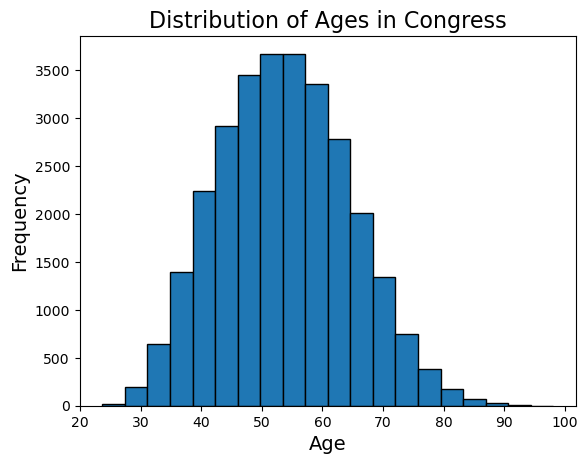

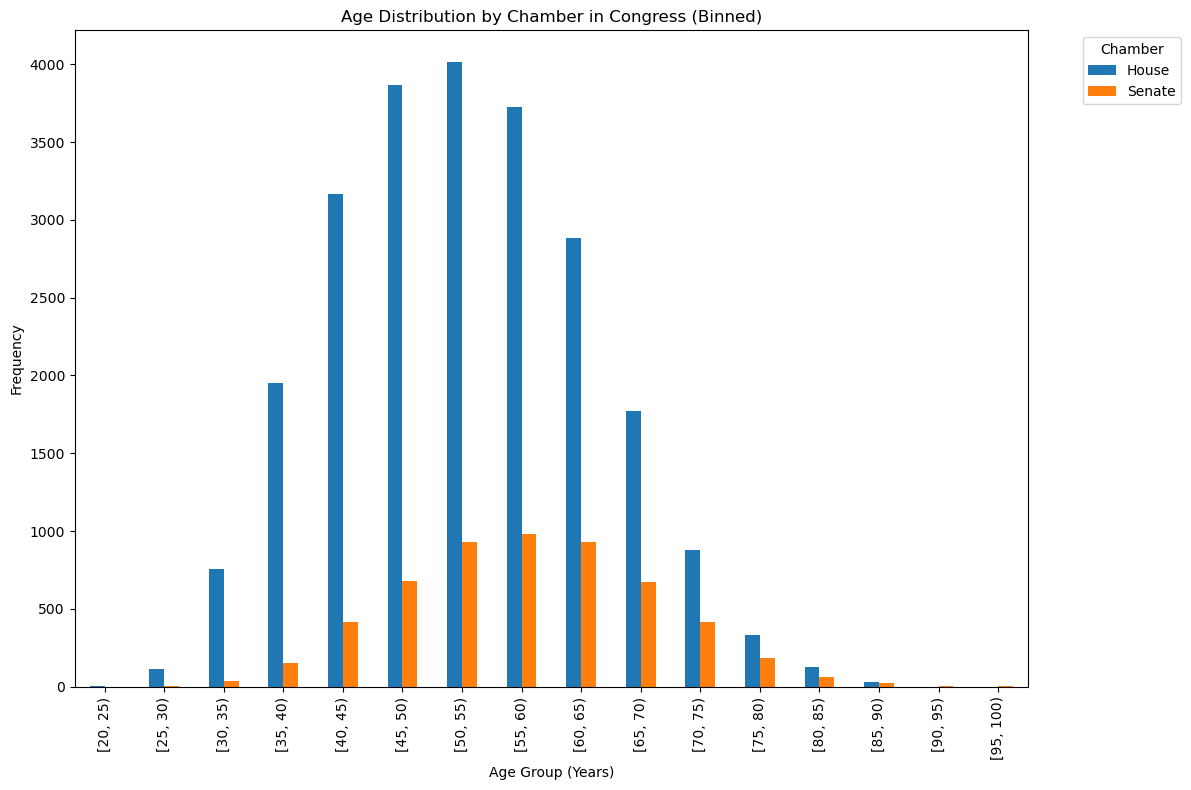

In [7]:
# Run the functions to return the charts
hist_cong_age(dataframe, "age_years")
age_dist_50(dataframe, desc_stats)

In [8]:
# To manipulate data, we are creating a function for data manipluation to subset data on a specific generation and will return the descriptive statistics for the dataset.
def subset(dataframe, conditonal):
    dataframe_gen = dataframe[dataframe["generation"] == conditonal]
    return dataframe_gen


dataframe_gen = subset(dataframe, "Lost")
print(dataframe_gen.sample(5))

desc_stats = stat_update(dataframe, "cmltv_cong")
print(desc_stats)

       congress start_date chamber state_abbrev  party_code  \
16881        75 1937-01-03   House           MA         200   
27003        83 1953-01-03  Senate           NH         200   
24875        84 1955-01-03   House           NY         200   
8934         79 1945-01-03   House           RI         100   
1330         84 1955-01-03   House           IN         200   

                                   bioname bioguide_id    birthday  \
16881          MARTIN, Joseph William, Jr.     M000191  1884-11-03   
27003                UPTON, Robert William     U000032  1884-02-03   
24875  ST. GEORGE, Katharine Price Collier     S000764  1894-07-12   
8934                   FORAND, Aime Joseph     F000255  1895-05-23   
1330                BEAMER, John Valentine     B000276  1896-11-17   

       cmltv_cong  cmltv_chamber  age_days  age_years generation age_group  
16881           7              7     19053  52.164271       Lost  [50, 55)  
27003           1              1     25171  68